## Time-Dependent Schrödinger Equation
The 1-D time-dependent Schrödinger equation is
\begin{align}
i \hbar \frac{\partial \Psi}{\partial t} &= -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi}{\partial x^2} + V(x) \; \Psi(x,t) \\
\end{align}
where $\Psi$ is the particle's wave function, $\hbar$ is Planck's constant, $m$ is the particle's mass, and $i$ is the imaginary number.
For this notebook, we define the symmetric boundary conditions placed on the Schrödinger equation over the interval $[-L, L]$ such that
\begin{align}
\Psi(-L, t) &= 0, \\
\Psi(L, t) &= 0. \\
\end{align}
We take the initial condition to be
\begin{align}
    \Psi(x, 0) &=  \frac{1}{\sqrt{\sqrt{2\pi}} \sigma } e^{ -\frac{1}{2}\left(\frac{x - x_0}{\sigma} \right)^2} e^{i k_0 x} = \psi_0.
\end{align}
which is a Gaussian wave packet centered at $x_0$. 
### Numerical methods
We define a spatial mesh over the interval $[a,b]$ such that $x_j = a + j\Delta x$ where $j = 0,1,2, \dotsb N$ and $\Delta x = (b-a)/N$. Using a central finite difference method, the spatial differential operator acting on the wavefunction can be approximated with 
\begin{align}
\frac{\partial^2 \Psi}{\partial x^2} \approx \frac{\Psi(x + \Delta x, t) - 2\Psi(x, t) + \Psi(x -\Delta x, t)}{ (\Delta x)^2} + O((\Delta x)^2).
\end{align}
With this, we can define the discrete spatial derivatives at each of the mesh points as
\begin{align}
\frac{\partial^2 \Psi_j}{\partial x^2} \approx \frac{\Psi_{j+1} -2\Psi_{j} + \Psi_{j-1}}{(\Delta x)^2}
\end{align}
for $j = 1, 2, \dotsb N-1$. Using this, we can create a system of ordinary differential equations (ODEs) at each spatial mesh point. 
\begin{align}
  i \hbar\frac{\partial \Psi_{j}}{\partial t} = \frac{-\hbar^2}{2m (\Delta x)^2} \left(\Psi_{j+1} -2\Psi_{j} + \Psi_{j-1} \right) + V(x_j)\Psi_j
\end{align}
for $j = 1, 2, \dotsb N-1$. At the inner and outer boundary points, $\Psi_0$ and $\Psi_{N}$ respectively, we impose the boundary conditions
\begin{align}
    \Psi_{0} = 0, \\
    \Psi_{N} = 0.
\end{align}
With these boundary conditions, we have the system of discrete ODEs 
\begin{align}
i \hbar \frac{d \Psi_0}{dt} &= 0,\\
i \hbar \frac{d \Psi_1}{dt} &= - \frac{\hbar^2}{2 m (\Delta x)^2}\left( - 2 \Psi_{1} + \Psi_{2} \right) + V(x_{1}) \Psi_1, \\
i \hbar \frac{d \Psi_2}{dt} &= - \frac{\hbar^2}{2 m (\Delta x)^2}\left(\Psi_{1} - 2 \Psi_{2} + \Psi_{3} \right) + V(x_{2}) \Psi_2, \\ 
& \vdots \\ 
i \hbar \frac{d \Psi_{N-2}}{dt} &= - \frac{\hbar^2}{2 m (\Delta x)^2}\left(\Psi_{N-3} - 2 \Psi_{N-2} + \Psi_{N-1} \right) + V(x_{N-2}) \Psi_{N-2}, \\ 
i \hbar \frac{d \Psi_{N-1}}{dt} &= - \frac{\hbar^2}{2 m (\Delta x)^2}\left(\Psi_{N-2} - 2 \Psi_{N-1} \right) + V(x_{N-1}) \Psi_{N-1}, \\ 
i \hbar \frac{d\Psi_{N}}{dt} &= 0.
\end{align}
Solving this system of ODEs will allow us to approximate the wave function at each spatial point. 
### Matrix Form of the Discretized Schrödinger Equation
Modern python libraries makes solving a system of ordinary differential equations very easy. To do this optimally, it is advantageous to organize the system into a single matrix equation. Organizing the system into a matrix equation, we have
\begin{align}
i \hbar \frac{d}{dt}
\begin{pmatrix}
\Psi_1 \\
\Psi_{2}   \\
\Psi_{3} \\ 
\vdots\\
\Psi_{N-2} \\
\Psi_{N-1} 
\end{pmatrix}
&=
-\frac{\hbar^2}{2 m (\Delta x)^2}
\begin{pmatrix}
-2 & 1 &  &  \cdots &  & 0 \\
1 & -2 & 1 &  &  & \\
0 &  1 &  -2 &  1 &  & \vdots\\
\vdots & & \ddots & \ddots & \ddots & 0\\
& &  & 1 & -2 & 1 \\
0 &  & \cdots &  & 1 & -2 
\end{pmatrix}
\begin{pmatrix}
\Psi_1 \\
\Psi_{2}   \\
\Psi_{3} \\ 
\vdots\\
\Psi_{N-2} \\
\Psi_{N-1} 
\end{pmatrix}
+\begin{pmatrix}
V(x_1) & 0 &  &  \cdots &  & 0 \\
0 & V(x_2) & 0 &  &  & \\
0 &  0 &  V(x_3) &  0 &  & \vdots\\
\vdots & & \ddots & \ddots & \ddots & 0\\
& &  & 0 & V(x_{N-2}) & 0 \\
0 &  & \cdots &  & 0 & V(x_{N-1}) 
\end{pmatrix}
\begin{pmatrix}
\Psi_1 \\
\Psi_{2}   \\
\Psi_{3} \\ 
\vdots\\
\Psi_{N-2} \\
\Psi_{N-1} 
\end{pmatrix}
\end{align}
or 
\begin{align}
i \hbar \frac{d \vec{\Psi}}{dt} &= H \vec{\Psi}, \quad \quad \vec{\Psi}(0) = \psi_0.
\end{align}
where we define $H$ as 
\begin{align}
H =
-\frac{\hbar^2}{2 m (\Delta x)^2}
\begin{pmatrix}
-2 & 1 &  &  \cdots &  & 0 \\
1 & -2 & 1 &  &  & \\
0 &  1 &  -2 &  1 &  & \vdots\\
\vdots & & \ddots & \ddots & \ddots & 0\\
& &  & 1 & -2 & 1 \\
0 &  & \cdots &  & 1 & -2 
\end{pmatrix}
+\begin{pmatrix}
V(x_1) & 0 &  &  \cdots &  & 0 \\
0 & V(x_2) & 0 &  &  & \\
0 &  0 &  V(x_3) &  0 &  & \vdots\\
\vdots & & \ddots & \ddots & \ddots & 0\\
& &  & 0 & V(x_{N-2}) & 0 \\
0 &  & \cdots &  & 0 & V(x_{N-1}) 
\end{pmatrix}
\end{align}
which can be thought out as the discretized Hamiltonian operator. To complete the solution, the boundary value solutions ($\Psi_0 =\Psi_{N} = 0$) must be put in after this equation is solved. In this form, the system can be solved using a numerical integrator.

In [1]:
import scipy 
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation, FFMpegWriter

In [2]:
# Atomic units
hbar = 1
mass = 1

In [3]:
# Define spacial mesh 
a = -20
b = 20
N = 4096
x = np.linspace(a, b, N)

In [4]:
# Step potential function  
def step_potential(x):
    V0 = 175
    return np.where(x > 7, V0, 0)

In [5]:
# Construct discretized "Kinetic Energy" operator
delta_x = np.abs(x[1] - x[0])
T = -(hbar**2/(2*mass*delta_x**2)) * scipy.sparse.diags([1,-2,1], [-1,0,1], shape=(N-2, N-2))

In [6]:
# Construct discretized "Potential Energy" operator
V = scipy.sparse.diags(step_potential(x[1:-1]), 0)

In [7]:
# Hamiltonian operator 
H = T + V

In [8]:
#Initial condition of a Gaussian wavepacket
def gaussian_wavepacket(x, x0, simga, k0):
    '''Initial condition of a Gaussian wavepacket'''
    norm_constant = 1/(np.sqrt(np.sqrt(2*np.pi) * simga))
    return norm_constant * np.exp(-0.5 * ((x - x0) / simga)**2) * np.exp(1j*k0*x)

In [ ]:
# Initial condition 
psi_0 = gaussian_wavepacket(x, x0=0, simga=0.5, k0=20)

In [9]:
# Solution of the ODEs (neglecting boundary values)
times = np.arange(0, 1, 0.01)
tspan = [times[0], times[-1]]
func = lambda t, psi: (-1j/hbar) * H.dot(psi)

sol = solve_ivp(func, tspan, psi_0[1:-1], method='RK23', t_eval=times)

MovieWriter ffmpeg unavailable; using Pillow instead.


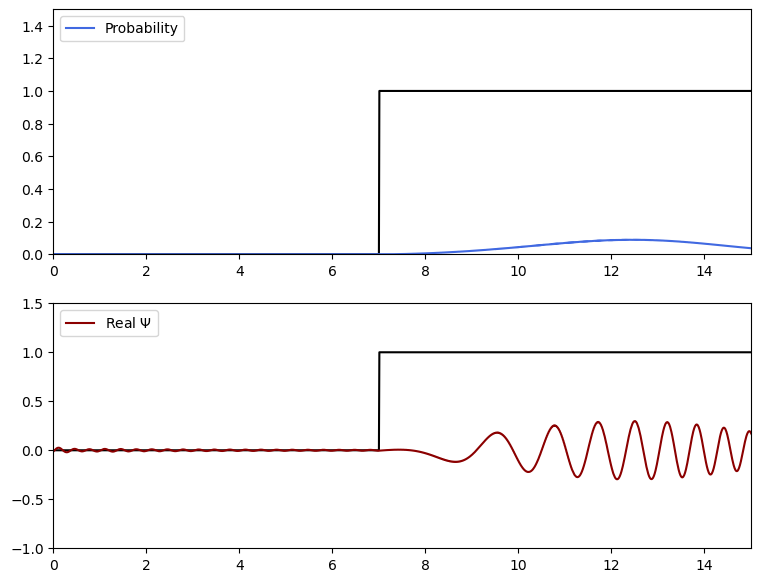

In [16]:
# Animating the results 
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,7))
norm_potential = step_potential(x) / max(step_potential(x))
ax1.plot(x, norm_potential, color='black')
ax2.plot(x, norm_potential, color='black')

line_prob, = ax1.plot([], [], label='Probability', color='royalblue')
line_real, = ax2.plot([], [], label='Real $\Psi$', color='darkred')
lines = [line_prob, line_real]

def init():
    lines[0].set_data(x[1:-1], np.abs(sol.y[:, 0]**2))
    lines[1].set_data(x[1:-1], np.real(sol.y[:, 0]))
    return lines

def animate(frame):
    lines[0].set_data(x[1:-1], np.abs(sol.y[:, frame]**2))
    lines[1].set_data(x[1:-1], np.real(sol.y[:, frame]))
    return lines

ax1.set_xlim([0, 15])
ax1.set_ylim([0, 1.5]) 

ax2.set_xlim([0, 15])
ax2.set_ylim([-1, 1.5])
ax1.legend(loc='upper left') 
ax2.legend(loc='upper left') 

anim = FuncAnimation(fig, animate, init_func=init,
                    frames=len(sol.t), interval=0.7, blit=True)

anim.save('step_potential.gif', fps=15, dpi=200)